In [1]:
import sys
# adding MPS Folderpath to the system path
sys.path.insert(0, '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/src/compression')

from mps_ND import NDMPS
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from utils_ND import *
import pickle as pkl

/Users/maxge/miniconda3/envs/QEL/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


ModuleNotFoundError: No module named 'src'

In [2]:
mri_file = '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/Python for MRI/anat.nii.gz'
img = nib.load(mri_file)
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(240, 240, 220)


(240, 220)


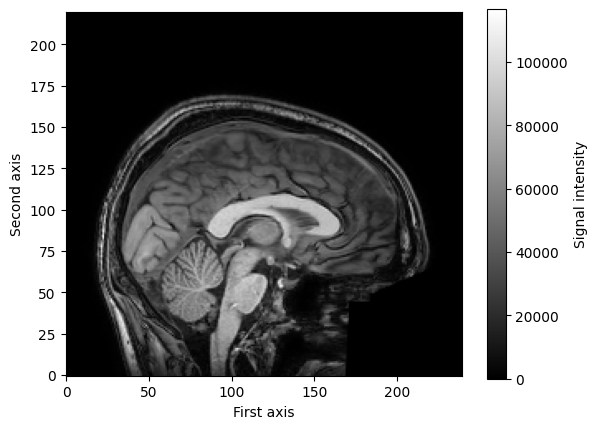

In [3]:
mid_slice_x = img_data[119, :, :]
print(mid_slice_x.shape)
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [4]:
mps = NDMPS.from_tensor(img_data, norm = False)

/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/src/compression/utils_ND.py:82: RuntimeWarning: invalid value encountered in cast
  prod_block_sizes[0] = prod_block_sizes[0] * 1e100


In [5]:
mps.compression_ratio()

np.float64(0.819056581439394)

In [6]:
mps.continuous_compress(0.03)

Compression ratio at 0.0003: 0.819056581439394
Compression ratio at 0.0015: 0.473772490530303
Compression ratio at 0.003: 0.41343158143939396
Compression ratio at 0.006: 0.40560961174242427
Compression ratio at 0.015: 0.3411134785353535
Compression ratio at 0.024: 0.25404379734848487
Compression ratio at 0.03: 0.2131445707070707


In [7]:
mps.compression_ratio()

np.float64(0.2131445707070707)

In [8]:
recovered_img = mps.to_tensor()

y: 10:220
z: :175
x: 40:200

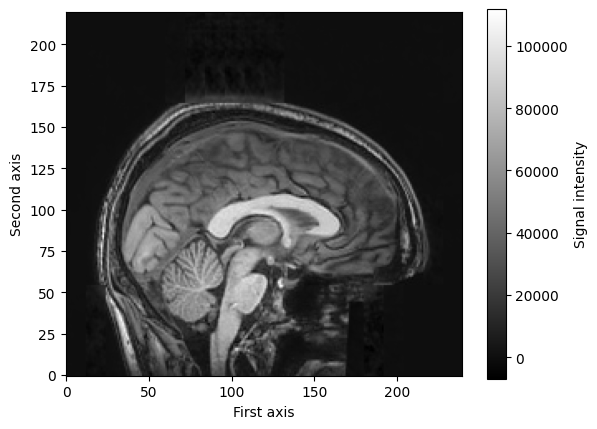

In [9]:
plt.imshow(recovered_img[119,:,:].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [10]:
avg_SSIM_3D(img_data, recovered_img)

np.float64(0.9351497734384476)

In [11]:
with open('mps_comp.pkl', 'wb') as f:
    pkl.dump(mps.encoding_map, f)

In [11]:
mps.bond_sizes()

[28, 313, 96]

In [13]:
mps_tensors = mps.mps.tensors()

TypeError: 'tuple' object is not callable

In [56]:
mps.continuous_compress(0.01)

Compression ratio at 0.0001: 0.819056581439394
Compression ratio at 0.0005: 0.7017270359848485
Compression ratio at 0.001: 0.5084126420454546
Compression ratio at 0.002: 0.41901870265151514
Compression ratio at 0.005: 0.40560961174242427
Compression ratio at 0.008: 0.3977876420454545
Compression ratio at 0.01: 0.384453125


In [60]:
j = 3
np.min(mps.mps.arrays[j]), np.max(mps.mps.arrays[j])

(np.float64(-9.756420346229111), np.float64(11.425306838701848))

In [26]:
mps.qubit_size

array([ 30,  32,  80, 165])

In [32]:
shapes = [t.shape for t in mps.mps.arrays]
shapes

[(30, 28), (28, 32, 313), (313, 80, 96), (96, 165)]

In [36]:
new_arrays = [np.random.rand(*shape) for shape in shapes]

In [42]:
tuple(new_arrays)

(array([[0.93834854, 0.35486139, 0.57188464, 0.658536  , 0.20363831,
         0.01233914, 0.84133358, 0.23149855, 0.41042001, 0.51668119,
         0.81417256, 0.170991  , 0.24719805, 0.89722939, 0.09681609,
         0.20097738, 0.2757537 , 0.35700456, 0.02623868, 0.68034067,
         0.61180695, 0.71962713, 0.31485974, 0.22260221, 0.41703827,
         0.55111229, 0.51713408, 0.64445639],
        [0.06997663, 0.63654235, 0.10582462, 0.54790355, 0.9416547 ,
         0.55492596, 0.52606933, 0.7494647 , 0.7255187 , 0.39215512,
         0.27539116, 0.72604706, 0.75152351, 0.57838522, 0.3032328 ,
         0.86219397, 0.43469343, 0.85105705, 0.35312728, 0.66344298,
         0.00723822, 0.32197941, 0.65208898, 0.52179294, 0.88442733,
         0.69014958, 0.91775013, 0.47103679],
        [0.40754595, 0.11364435, 0.99408005, 0.49695825, 0.04863515,
         0.48458505, 0.4349125 , 0.39865897, 0.08654948, 0.86975874,
         0.87912177, 0.48190245, 0.2504886 , 0.54684519, 0.69418819,
         0.

In [43]:
mps.mps.arrays = tuple(new_arrays)

AttributeError: can't set attribute 'arrays'

In [47]:
arrays_list = list(mps.mps.arrays[0])
mps.mps.arrays[0] = tuple(arrays_list)

TypeError: 'tuple' object does not support item assignment

In [56]:
mps.mps.arrays[0][:] = np.random.rand(30,28)

In [57]:
recovered_test = mps.to_tensor()

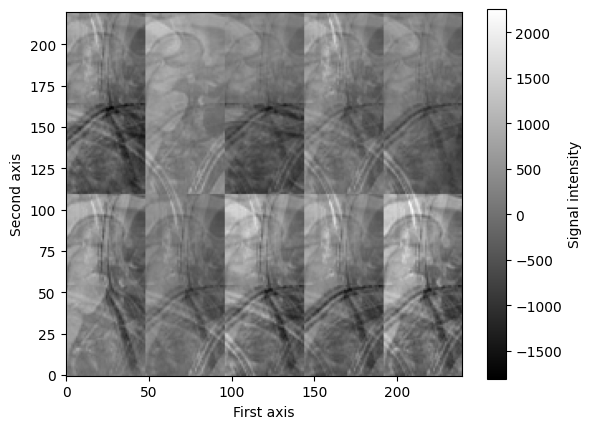

In [58]:
plt.imshow(recovered_test[119,:,:].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [59]:
mps = NDMPS.from_tensor(img_data, norm = False)

/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/src/compression/utils_ND.py:84: RuntimeWarning: invalid value encountered in cast
  prod_block_sizes[0] = prod_block_sizes[0] * 1e100
